# PROJECT 1

# 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.


In [374]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# ML algorithm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier

import warnings 
warnings.filterwarnings( "ignore")



In [375]:
df = pd.DataFrame(pd.read_excel("Election_Data.xlsx")) #EXCEL FILE READY TO READ

In [376]:
df


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...,...
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male


In [377]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [379]:

# Remove column 
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


THERE ARE 2 COLUMNS IN A CATOGORICAL FORMATE (VOTE AND GENDER)

In [381]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [382]:
df.shape

(1525, 9)

In [383]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [384]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [385]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [386]:
df.drop_duplicates(keep=False, inplace=True)


In [387]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [388]:
df.skew()

age                        0.134944
economic.cond.national    -0.236477
economic.cond.household   -0.138688
Blair                     -0.543655
Hague                      0.140236
Europe                    -0.147907
political.knowledge       -0.418982
dtype: float64

# 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.


In [389]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [390]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [391]:
df.shape

(1509, 9)

In [392]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     458
Labour          1051
Name: vote, dtype: int64


GENDER :  2
male      705
female    804
Name: gender, dtype: int64




In [393]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [394]:
# UNIVARIATE

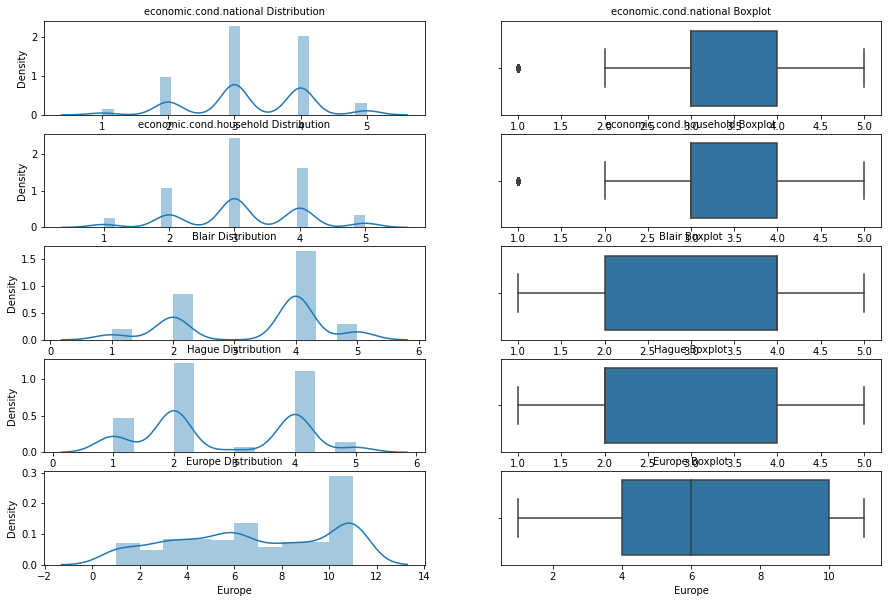

In [395]:



fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15,10)


a = sns.distplot(df['economic.cond.national'] , ax=axes[0][0])
a.set_title("economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[0][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)

a = sns.distplot(df['economic.cond.household'] , ax=axes[1][0])
a.set_title("economic.cond.household Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)

a = sns.distplot(df['Blair'] , ax=axes[2][0])
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[2][1])
a.set_title("Blair Boxplot",fontsize=10)


a = sns.distplot(df['Hague'] , ax=axes[3][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[3][1])
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(df['Europe'] , ax=axes[4][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[4][1])
a.set_title("Europe Boxplot",fontsize=10)




plt.show()

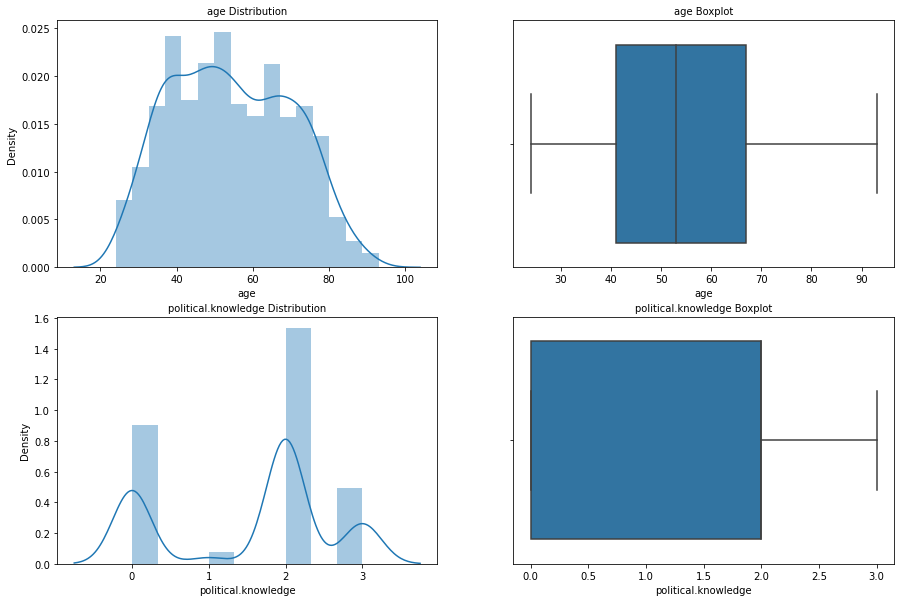

In [396]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,10)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)


a = sns.distplot(df['political.knowledge'] , ax=axes[1][0])
a.set_title("political.knowledge Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[1][1])
a.set_title("political.knowledge Boxplot",fontsize=10);

In [397]:
# BIVARIATE

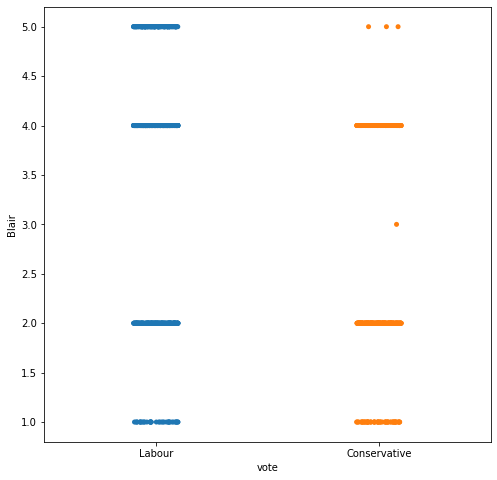

In [398]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Blair'], jitter=True) 
plt.show()

in blair labour vote will be  more than conservative 

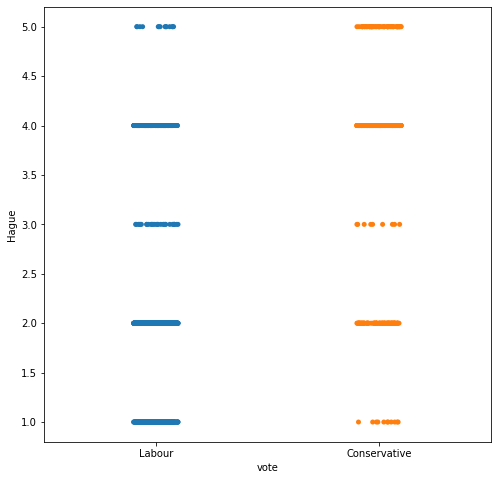

In [399]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Hague'], jitter=True) 
plt.show()

in hague the labour and conservative voters will give the proper fight 

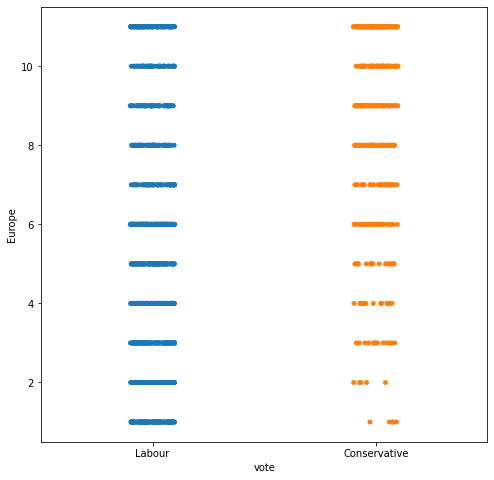

In [400]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Europe'], jitter=True) 
plt.show()

the labour parties has more chances to win in europe 

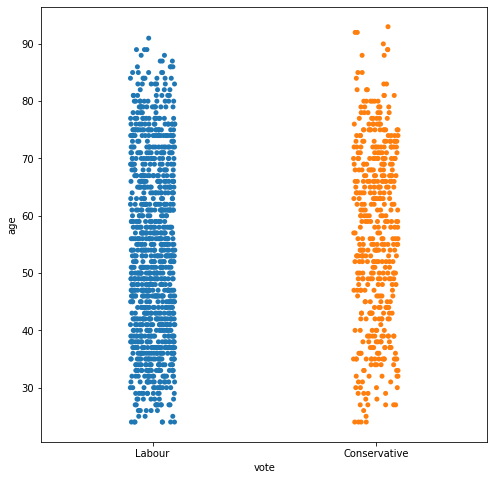

In [401]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['age'], jitter=True) 
plt.show()

labour have more voters in the range of 30 to 75 age

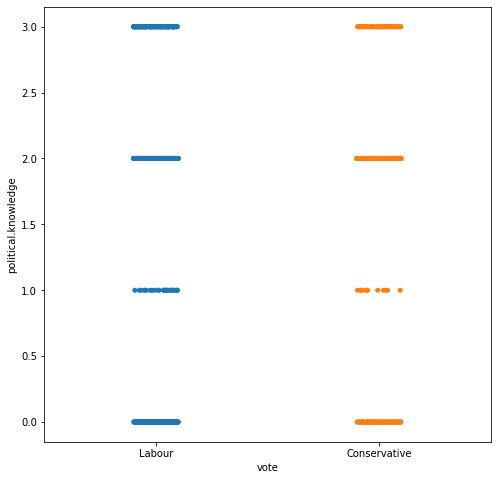

In [402]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['political.knowledge'], jitter=True) 
plt.show()

somewhere we r lookig that conservatives have low political knowledge

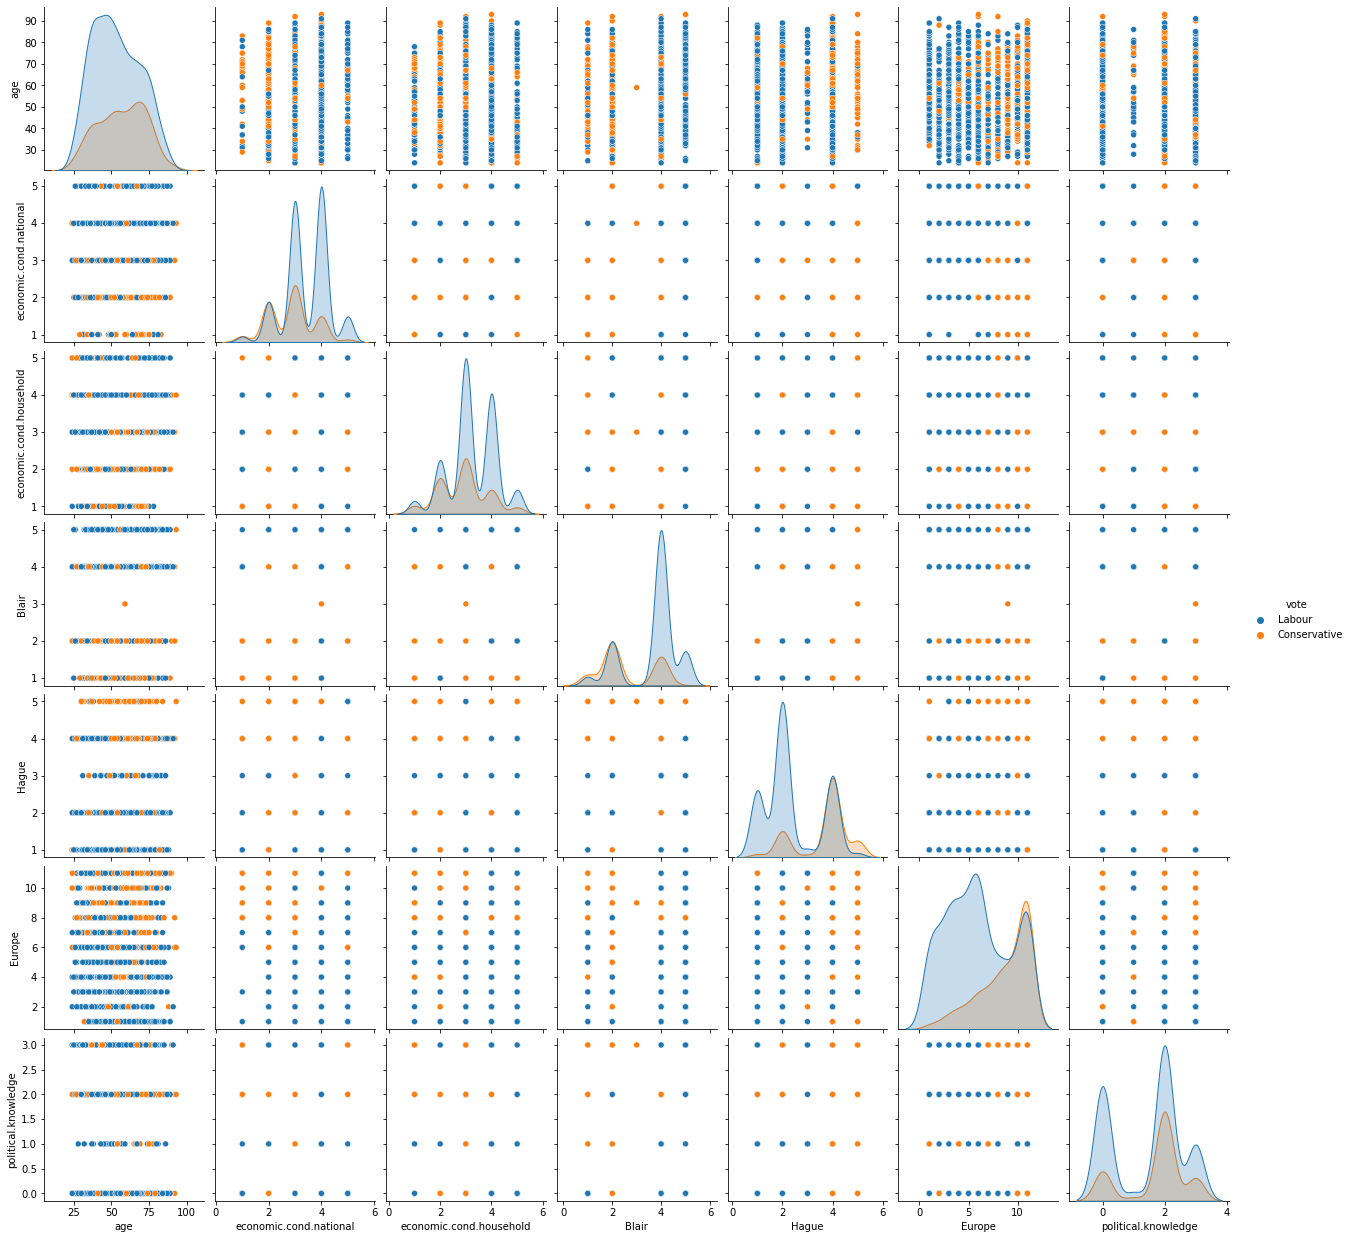

In [403]:
sns.pairplot(df,hue="vote")

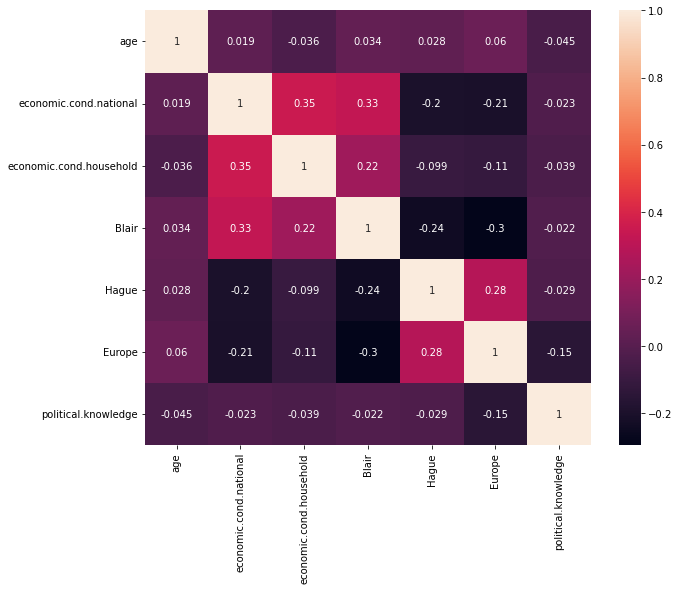

In [404]:
#CORRELATION 



plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In above plot pink colour represents maximum correlation and pruple colour represents minimum correlation.
We can see none of variable have correlation with any other variables.

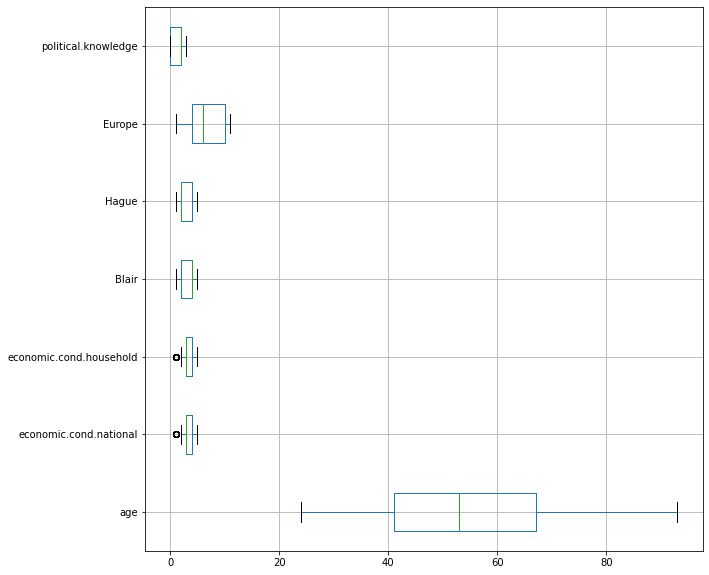

In [405]:
#checking for outlier


# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.iloc[:,:8].boxplot(vert=0)
plt.show()

THERE IS SOME OUTLIERS IN THE ECONOMICE.COND.HOUSEHOLD AND ECONOMIC.COND.NATIONAL COLUMNS 

In [406]:
#outlier treament




def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [407]:
lr,ur=remove_outlier(df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]>ur,ur,df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]<lr,lr,df["economic.cond.household"])

lr,ur=remove_outlier(df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]>ur,ur,df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]<lr,lr,df["economic.cond.national"])

<AxesSubplot:>

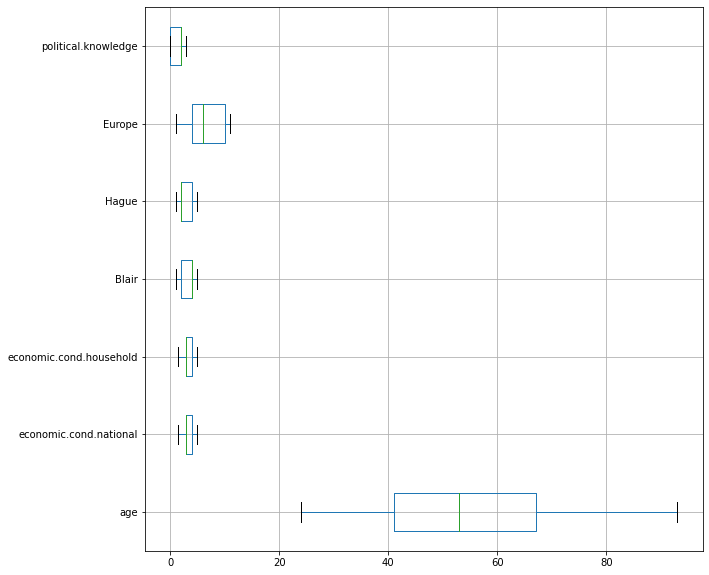

In [408]:
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)

AFTER THE OUTLIERS TREAMENT

# 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.


In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1509 non-null   object 
 1   age                      1509 non-null   int64  
 2   economic.cond.national   1509 non-null   float64
 3   economic.cond.household  1509 non-null   float64
 4   Blair                    1509 non-null   int64  
 5   Hague                    1509 non-null   int64  
 6   Europe                   1509 non-null   int64  
 7   political.knowledge      1509 non-null   int64  
 8   gender                   1509 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 150.2+ KB


In [410]:
df.var()

age                        246.237009
economic.cond.national       0.729936
economic.cond.household      0.787257
Blair                        1.379962
Hague                        1.523412
Europe                      10.893439
political.knowledge          1.178370
dtype: float64

In [411]:
## Converting categorical into dummies
df = pd.get_dummies(df, drop_first=True)

In [412]:
df.head(100)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3.0,3.0,4,1,2,2,1,0
1,36,4.0,4.0,4,4,5,2,1,1
3,24,4.0,2.0,2,1,4,0,1,0
4,41,2.0,2.0,1,1,6,2,1,1
5,47,3.0,4.0,4,4,4,2,1,1
...,...,...,...,...,...,...,...,...,...
98,74,3.0,4.0,2,4,1,0,1,1
99,67,3.0,4.0,5,1,11,0,1,1
100,40,4.0,4.0,4,2,6,0,1,1
101,71,3.0,4.0,4,2,3,2,1,1


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1509 non-null   int64  
 1   economic.cond.national   1509 non-null   float64
 2   economic.cond.household  1509 non-null   float64
 3   Blair                    1509 non-null   int64  
 4   Hague                    1509 non-null   int64  
 5   Europe                   1509 non-null   int64  
 6   political.knowledge      1509 non-null   int64  
 7   vote_Labour              1509 non-null   uint8  
 8   gender_male              1509 non-null   uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 129.5 KB


# Spliting

In [414]:
X = df.drop("vote_Labour" , axis=1)
y = df.pop("vote_Labour")

In [415]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [416]:
#Checking the number of rows and columns in Train & Test dataframe
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (1056, 8)
 Shape of y_train is :  (1056,)
 Shape of X_test is  :  (453, 8)
 Shape of y_test is  :  (453,)


In [417]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

69.98% data is in training set
30.02% data is in test set


In [418]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3.0,3.0,4,1,2,2,0
1,36,4.0,4.0,4,4,5,2,1
3,24,4.0,2.0,2,1,4,0,0
4,41,2.0,2.0,1,1,6,2,1
5,47,3.0,4.0,4,4,4,2,1


In [419]:
y.head()

0    1
1    1
3    1
4    1
5    1
Name: vote_Labour, dtype: uint8

 Split X and y into training and test set in 70:30 ratio


# Modelling 


In [420]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# initiantiate learning model (k = 3)
KNN_model=KNeighborsClassifier(n_neighbors = 3,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=3 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 5)
KNN_model=KNeighborsClassifier(n_neighbors = 5,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=5 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 9)
KNN_model=KNeighborsClassifier(n_neighbors = 9,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=9 is ", KNN_model.score(X_test, y_test))

Accuracy Score for K=3 is  0.7748344370860927
Accuracy Score for K=5 is  0.7726269315673289
Accuracy Score for K=9 is  0.8101545253863135


In [421]:
#SCALING
print(num)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [422]:
### removing the correlated variable which was dropped earlier and target variable
num1= ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe']

In [423]:
df[num1] = df[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [424]:
## Check if the variables have been scaled or not
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0.275362,0.428571,0.428571,0.75,0.00,0.1,2,0
1,0.173913,0.714286,0.714286,0.75,0.75,0.4,2,1
3,0.000000,0.714286,0.142857,0.25,0.00,0.3,0,0
4,0.246377,0.142857,0.142857,0.00,0.00,0.5,2,1
5,0.333333,0.428571,0.714286,0.75,0.75,0.3,2,1


# 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)


In [425]:
#LR

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3        4         5         6  \
0 -0.009644  0.452169  0.148236  0.722248 -0.82089 -0.169225 -0.368465   

          7  intercept  
0  0.072629   1.419151  


In [426]:
model_score = model.score(X_train, y_train)
print(model_score)

0.8323863636363636


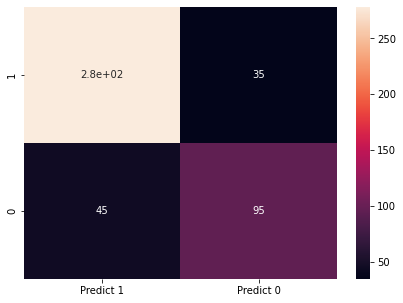

In [427]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [428]:
# Fit the model on test
model = LogisticRegression(solver="liblinear")
model.fit(X_test, y_test)
#predict on test
y_predict = model.predict(X_train)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0        1        2         3         4         5         6  \
0 -0.021055  0.72097  0.16383  0.415552 -0.717147 -0.267546 -0.357888   

          7  intercept  
0  0.210146   2.574943  


In [429]:
model_score = model.score(X_test, y_test)
print(model_score)

0.8498896247240618


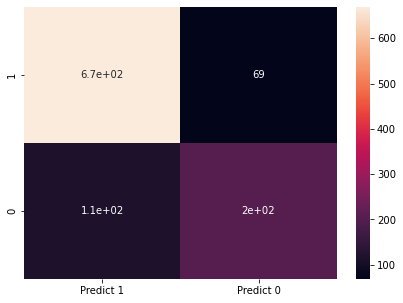

In [430]:
cm=metrics.confusion_matrix(y_train, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [431]:
df.rename(columns = {'economic.cond.national':'economiccondnational'}, inplace = True) 
df.rename(columns = {'economic.cond.household':'economiccondhousehold'}, inplace = True) 
df.rename(columns = {'political.knowledge':'politicalknowledge'}, inplace = True)
df.rename(columns = {'vote_Labour':'voteLabour'}, inplace = True) 
df.rename(columns = {'gender_male':'gendermale'}, inplace = True) 


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 0 to 1524
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1509 non-null   float64
 1   economiccondnational   1509 non-null   float64
 2   economiccondhousehold  1509 non-null   float64
 3   Blair                  1509 non-null   float64
 4   Hague                  1509 non-null   float64
 5   Europe                 1509 non-null   float64
 6   politicalknowledge     1509 non-null   int64  
 7   gendermale             1509 non-null   uint8  
dtypes: float64(6), int64(1), uint8(1)
memory usage: 128.1 KB


In [432]:
#Build LDA Model


# Refer details for LDA at http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,y)
model

LinearDiscriminantAnalysis()

In [433]:
# Predict it
pred_class = model.predict(X)
df['Prediction'] = pred_class 

In [434]:
# Check Correlation values
#Refer on correlation at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
data= df[['age','economiccondnational','economiccondhousehold','Blair','Hague','Europe','politicalknowledge','gendermale']]
Cor1 = data.corr()
Cor1

,age,economiccondnational,economiccondhousehold,Blair,Hague,Europe,politicalknowledge,gendermale
age,1.000000,0.022378,-0.041611,0.033965,0.027614,0.060172,-0.044676,-0.016097
economiccondnational,0.022378,1.000000,0.345991,0.322798,-0.200264,-0.206348,-0.029153,0.055926
economiccondhousehold,-0.041611,0.345991,1.000000,0.217194,-0.098025,-0.110138,-0.041253,0.032208
Blair,0.033965,0.322798,0.217194,1.000000,-0.243815,-0.295734,-0.021682,0.065222
Hague,0.027614,-0.200264,-0.098025,-0.243815,1.000000,0.284105,-0.029449,-0.027201
Europe,0.060172,-0.206348,-0.110138,-0.295734,0.284105,1.000000,-0.150013,-0.074583
politicalknowledge,-0.044676,-0.029153,-0.041253,-0.021682,-0.029449,-0.150013,1.000000,0.155655
gendermale,-0.016097,0.055926,0.032208,0.065222,-0.027201,-0.074583,0.155655,1.000000


In [435]:
confusion_matrix(y, pred_class)

array([[315, 143],
       [105, 946]], dtype=int64)

In [436]:
from sklearn.metrics import classification_report
print(classification_report(y, pred_class))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       458
           1       0.87      0.90      0.88      1051

    accuracy                           0.84      1509
   macro avg       0.81      0.79      0.80      1509
weighted avg       0.83      0.84      0.83      1509



# 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)


In [437]:
from sklearn.model_selection import cross_validate


Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [438]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....15
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE


[0.26048565121412803,
 0.22516556291390732,
 0.22737306843267113,
 0.20309050772626935,
 0.1898454746136865,
 0.19646799116997793,
 0.1876379690949227,
 0.1876379690949227,
 0.17880794701986757,
 0.17880794701986757]

In [439]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [440]:
## Performance Matrix on train data set

y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8522727272727273
[[223  95]
 [ 61 677]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       318
           1       0.88      0.92      0.90       738

    accuracy                           0.85      1056
   macro avg       0.83      0.81      0.82      1056
weighted avg       0.85      0.85      0.85      1056



In [441]:
## Performance Matrix on test data set

y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7726269315673289
[[ 82  58]
 [ 45 268]]
              precision    recall  f1-score   support

           0       0.65      0.59      0.61       140
           1       0.82      0.86      0.84       313

    accuracy                           0.77       453
   macro avg       0.73      0.72      0.73       453
weighted avg       0.77      0.77      0.77       453



In [442]:
from sklearn.naive_bayes import GaussianNB


In [443]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       140
           1       0.88      0.88      0.88       313

    accuracy                           0.83       453
   macro avg       0.81      0.81      0.81       453
weighted avg       0.83      0.83      0.83       453

[[103  37]
 [ 38 275]]



Precision: Within a given set of positively-labeled results, the fraction that were true positives = tp/(tp + fp) Recall: Given a set of positively-labeled results, the fraction of all positives that were retrieved = tp/(tp + fn) Accuracy: tp + tn / (tp + tn + fp +fn) But this measure can be dominated by larger class. Suppose 10, 90 and 80 of 90 is correctly predicted while only 2 of 0 is predicted correctly. Accuracy is 80+2 / 100 i.e. 82%

TO over come the dominance of the majority class, use weighted measure (not shown)

F is harmonic mean of precision and recal given by ((B^2 +1) PR) / (B^2P +R) When B is set to 1 we get F1 = 2PR / (P+R)

# 1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.


In [444]:
from IPython.display import Image  
    from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [445]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [446]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.7505518763796909


In [447]:
## Performance Matrix on train data set
y_train_predict = dTree.predict(X_train)
model_score = dTree.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[318   0]
 [  0 738]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       738

    accuracy                           1.00      1056
   macro avg       1.00      1.00      1.00      1056
weighted avg       1.00      1.00      1.00      1056



In [448]:
## Performance Matrix on test data set
y_test_predict = dTree.predict(X_test)
model_score = dTree.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7505518763796909
[[ 98  42]
 [ 71 242]]
              precision    recall  f1-score   support

           0       0.58      0.70      0.63       140
           1       0.85      0.77      0.81       313

    accuracy                           0.75       453
   macro avg       0.72      0.74      0.72       453
weighted avg       0.77      0.75      0.76       453



In [449]:
## Reducing over fitting (Regularization)


dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8153409090909091
0.7660044150110376


In [450]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                              Imp
age                      0.000000
economic.cond.national   0.009259
economic.cond.household  0.000000
Blair                    0.321778
Hague                    0.581238
Europe                   0.046642
political.knowledge      0.041082
gender_male              0.000000


0.7660044150110376


<AxesSubplot:>

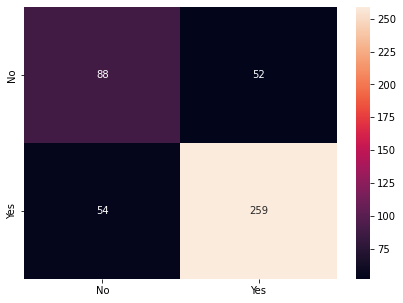

In [451]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [452]:
#Bagging




from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.8013245033112583


<AxesSubplot:>

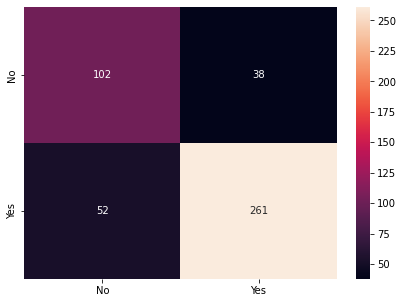

In [453]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [454]:
#Boosting


from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8233995584988962


<AxesSubplot:>

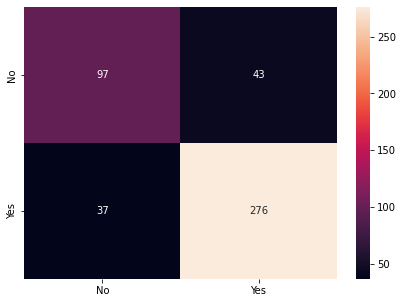

In [455]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)


In [456]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder

In [457]:
df.head()

,age,economiccondnational,economiccondhousehold,Blair,Hague,Europe,politicalknowledge,gendermale,Prediction
0,0.275362,0.428571,0.428571,0.75,0.00,0.1,2,0,1
1,0.173913,0.714286,0.714286,0.75,0.75,0.4,2,1,1
3,0.000000,0.714286,0.142857,0.25,0.00,0.3,0,0,1
4,0.246377,0.142857,0.142857,0.00,0.00,0.5,2,1,1
5,0.333333,0.428571,0.714286,0.75,0.75,0.3,2,1,1


In [458]:
# Model Performance & Evaluation
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix


In [459]:
# Predicting on Train and test data
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [460]:
# Getting the probability Score
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.195748,0.804252
1,0.044562,0.955438
2,0.081612,0.918388
3,0.976065,0.023935
4,0.028299,0.971701


In [461]:
# Accuracy - TARIN Data

model.score(X_train, y_train)

0.8304924242424242

AUC: 0.889


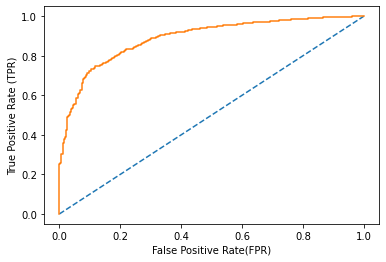

In [463]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)");

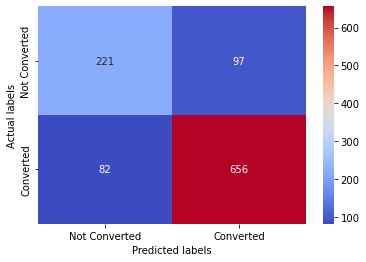

In [464]:
# Confusion Matrix on Train data
cm = metrics.confusion_matrix(y_train, ytrain_predict) 
sns.heatmap(cm, annot=True, fmt='.0f', cmap='coolwarm',
xticklabels = ["Not Converted", "Converted"] ,
yticklabels = ["Not Converted", "Converted"] ) 
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels') 
plt.show()

In [466]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8344370860927153

AUC: 0.889


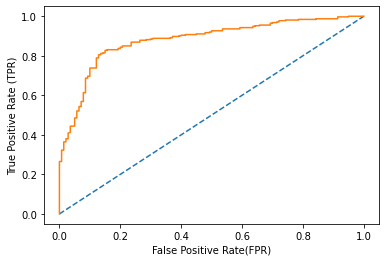

In [467]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)");

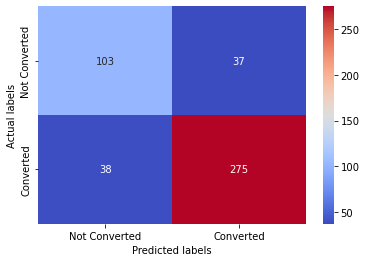

In [468]:
cm_test = metrics.confusion_matrix(y_test, ytest_predict) 
sns.heatmap(cm_test, annot=True, fmt='.0f', cmap='coolwarm',
xticklabels = ["Not Converted", "Converted"] ,
yticklabels = ["Not Converted", "Converted"] ) 
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels') 
plt.show()

In [469]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73       140
           1       0.88      0.88      0.88       313

    accuracy                           0.83       453
   macro avg       0.81      0.81      0.81       453
weighted avg       0.83      0.83      0.83       453



# 1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.


Support to remain relevant to the voters

Offer insight into trends influencing the election 

Alert of macroeconomic influence that may cause local operations

Also we can saw somewhere that Labour voters are more than the Conservative voters 
so we can say that labour party will have more chancess to will the election 


# end